In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [2]:
#Loading the MNIST data
mnist =  fetch_openml('mnist_784', version=1, cache=True)

In [3]:
print(mnist.data.shape)

(70000, 784)


In [4]:
print(mnist.target.shape)

(70000,)


In [5]:
#sklearn_to_df
df= pd.DataFrame(mnist.data,columns=mnist.feature_names)
df['target'] = pd.Series(mnist.target)

In [6]:
print(df.head())

   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  pixel781  \
0      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4      0.0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel782  pixel783  pixel784  target  
0       0.0       0.

In [7]:
print(df.describe())

        pixel1   pixel2   pixel3   pixel4   pixel5   pixel6   pixel7   pixel8  \
count  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0  70000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel9  pixel10  ...      pixel775      pixel776      pixel777  \
count  70000.0  70000.0  ...  70000.000000  70000.000000  70000.000000   
mean       0.0      0.0  ...      0.197414      0.099543      0.046629   
std        0.0      0.0  ...      5.991206      

In [8]:
print(df.tail())

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel776  pixel777  pixel778  pixel779  pixel780  \
69995      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69996      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69997      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69998      0.0  ...       0.0       0.0       0.0       0.0       0.0   
69999      0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel781  pixel782  pixel783  pixel784  target  
69995       0.0   

In [9]:
#Separate Features and Labels(target)
X, y = df.drop(labels = ["target"],axis = 1).to_numpy(), df["target"]

In [10]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: target, Length: 70000, dtype: object


In [11]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


0


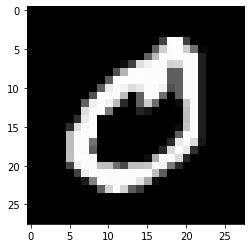

In [12]:
#plot some digit
some_digit = X[21]
plt.gray()
some_digit_show = plt.imshow(X[21].reshape(28,28))
print(y[21])

In [13]:
#Spliting Train and Test sets
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
#Training a binary classifier
y_train_0 = (y_train == 0)
y_test_0 = (y_test == 0)
print(sum(y_test_0))

sgd_clf = SGDClassifier(loss='log')
sgd_clf.fit(X_train, y_train_0)
print(sgd_clf.predict([some_digit])) #predict it's zero or not

683
[ True]


In [19]:
score=sgd_clf.score(X_test, y_test_0)
print(score)

0.9891428571428571


[[6284   33]
 [  43  640]]


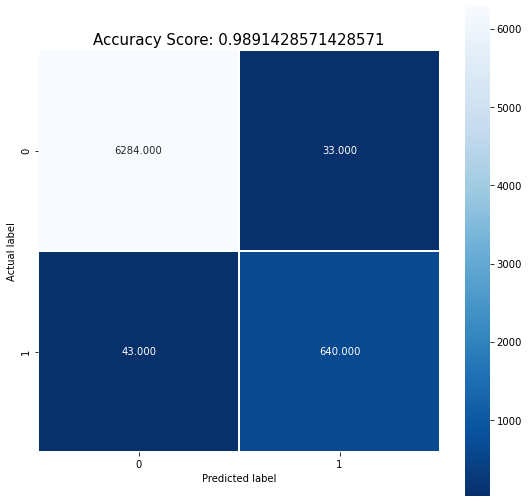

In [20]:
#CM
y_test_pred = sgd_clf.predict(X_test)
cm=confusion_matrix(y_test_0, y_test_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [23]:
#training for multiclass-classification
sgd_clf.fit(X_train, y_train)
y_test_pred = sgd_clf.predict(X_test)
print(y_test_pred)
print(y_test)

[8 4 5 ... 5 2 6]
46730    8
48393    4
41416    8
34506    7
43725    7
        ..
23300    8
55456    6
14951    5
34450    2
41050    6
Name: target, Length: 7000, dtype: uint8


In [29]:
#from sklearn.metrics import accuracy_score
score=sgd_clf.score(X_test,y_test)
print(score)

0.8801428571428571


[[650   0   9   0   1   2  10   0   4   7]
 [  0 776   4   4   0   1   4   3   6   2]
 [  1   6 562  33   7   1  29   6  25   4]
 [  2   4  26 680   0   9   5   7   9  18]
 [  0   1   5   6 515   0  11   2  15  56]
 [  6   3  10  67   6 462  18   8  55  23]
 [  5   2   6   0   3   3 654   2   1   1]
 [  1   2   7   2   5   1   0 668   2  36]
 [  5  11   5  57   2  14  22   8 532  37]
 [  3   3   3  18   4   1   0  23   3 662]]


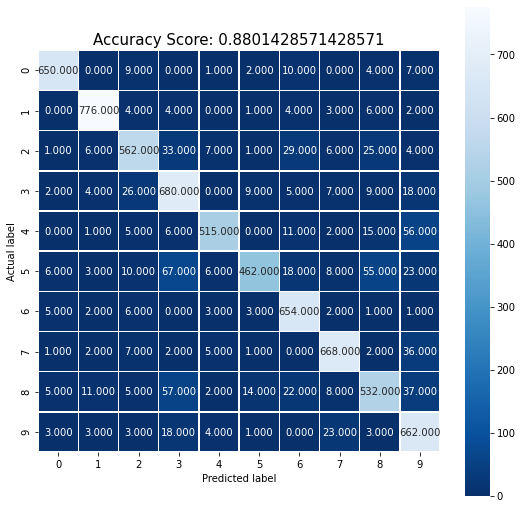

In [26]:
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);